In [ ]:
import jax.numpy as np
import jax
import matplotlib.pyplot as plt

# Data
x1 = np.array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
               0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
               0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
               0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
               0.66676672, 0.67063787, 0.21038256, 0.1289263 , 0.31542835,
               0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481,
               0.20887676, 0.16130952, 0.65310833, 0.2532916 , 0.46631077,
               0.24442559, 0.15896958, 0.11037514, 0.65632959, 0.13818295])

x2 = np.array([-0.24999769, -0.75622102, -0.54014984, -0.71570233, -0.93425276,
               -0.51517039, -0.26469997, -1.040206  , -0.50971184, -0.67431465,
               -0.78257333, -0.56633169, -0.26148872, -0.63172488, -0.04004657,
               -0.0114968 , -0.19777555, -1.22877914, -0.84773918, -0.83874235,
               -1.76892774, -1.90676431, -1.21601901, -1.04325992, -1.30212491,
               -1.30321639, -1.69706119, -1.51114975, -2.12286593, -1.17395544,
               -1.37150601, -1.50656604, -1.6176231 , -1.33364779, -1.79235044,
               -1.15186914, -1.34042926, -1.09998606, -1.51051148, -1.11238637])
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
              1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0.])



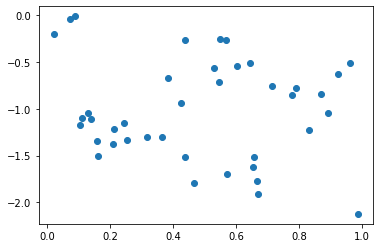

In [ ]:
plt.scatter(x1, x2)

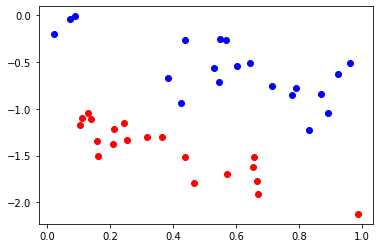

In [ ]:
plt.scatter(x1[y==0], x2[y==0], color='r')
plt.scatter(x1[y==1], x2[y==1], color='b')

In [ ]:
ones = np.ones_like(x1)
X = np.column_stack([ones, x1, x2])

def p(X, Θ):
  return jax.nn.sigmoid(X @ Θ)


def distance(a, b):
  from jax.scipy.special import xlogy
  # return -b * np.log(a) -(1 - b) * np.log(1 - a)
  return -xlogy(b, a) -xlogy(1 - b, 1 - a)

@jax.jit
def L(Θ):
  return np.mean(distance(p(X, Θ), y))

@jax.jit
def apply_gradient_descent(Θ):
  α = 1.
  return Θ - α * jax.grad(L)(Θ)

In [ ]:
Θ = np.zeros(3)

for iteration in range(400000):
  Θ = apply_gradient_descent(Θ)

  if iteration % 10000 == 0:
    print(L(Θ))


0.6501465
0.004602221
0.0025393295
0.0017678969
0.001360386
0.0011076216
0.00093509024
0.0008097561
0.00071435893
0.00063929893
0.00057870167
0.0005287758
0.0004868196
0.00045117066
0.0004204093
0.00039362232
0.00037004228
0.00034930877
0.00033072205
0.00031405638
0.00029904905
0.00028521763
0.00027289853
0.00026136884
0.00025097412
0.0002415047
0.00023275129
0.00022449861
0.00021654987
0.00020917016
0.00020237608
0.00019632527
0.00019063818
0.00018511718
0.00017976381
0.00017468473
0.00016988577
0.00016531794
0.00016097887
0.0001570657


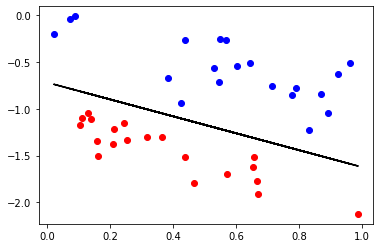

In [ ]:
plt.scatter(x1[y==0], x2[y==0], color='r')
plt.scatter(x1[y==1], x2[y==1], color='b')
x2_decision_bndry = -1 / Θ[2] * (Θ[0] + Θ[1] * x1)
plt.plot(x1, x2_decision_bndry, color='k')

In [ ]:
p(X, Θ)

DeviceArray([1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
             1.00000000e+00, 9.96982157e-01, 1.00000000e+00,
             1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
             9.99998689e-01, 1.00000000e+00, 1.00000000e+00,
             1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
             1.00000000e+00, 1.00000000e+00, 9.99769509e-01,
             1.00000000e+00, 1.00000000e+00, 1.90783751e-07,
             1.83435767e-09, 2.50761132e-05, 7.74927903e-04,
             3.38475038e-05, 1.46953724e-04, 1.12539134e-07,
             1.14778197e-06, 2.10539834e-08, 3.65717119e-06,
             1.10755607e-07, 2.35585940e-10, 2.32921957e-05,
             1.63859215e-06, 1.63400210e-10, 6.65771193e-04,
             6.83680810e-08, 6.11731375e-05, 1.04374939e-03,
             9.48603411e-05], dtype=float32)

In [ ]:
predictions = (p(X, Θ) > 0.5) * 1
predictions

DeviceArray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],            dtype=int32, weak_type=True)

In [ ]:
accuracy = (predictions == y).mean()
print(accuracy)

1.0
